In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
!curl -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: china_gdp.csv
Year,Value
1960,59184116488.9977
1961,49557050182.9631
1962,46685178504.3274
1963,50097303271.0232
1964,59062254890.1871
1965,69709153115.3147
1966,75879434776.1831
1967,72057028559.6741
1968,69993497892.3132
1969,78718820477.9257
1970,91506211306.3745
1971,98562023844.1813
1972,112159813640.376
1973,136769878359.668
1974,142254742077.706
1975,161162492226.686
1976,151627687364.405
1977,172349014326.931
1978,148382111520.192
1979,176856525405.729
1980,189649992463.987
1981,194369049090.197
1982,203549627211.606
1983,228950200773.115
1984,258082147252.256
1985,307479585852.339
1986,298805792971.544
1987,271349773463.863
1988,310722213686.031
1989,345957485871.286
1990,358973230048.399
1991,381454703832.753
1

In [23]:
df = pd.read_csv("china_gdp.csv")
df.head(10)


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10



# Plotting the Dataset

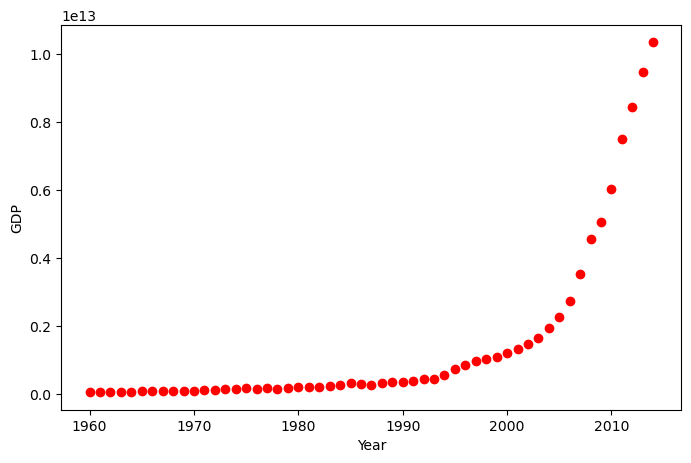

In [24]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Choosing a model

### Now, let's build our regression model and initialize its parameters.

In [26]:


def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y



### Lets look at a sample sigmoid line that might fit with the data:

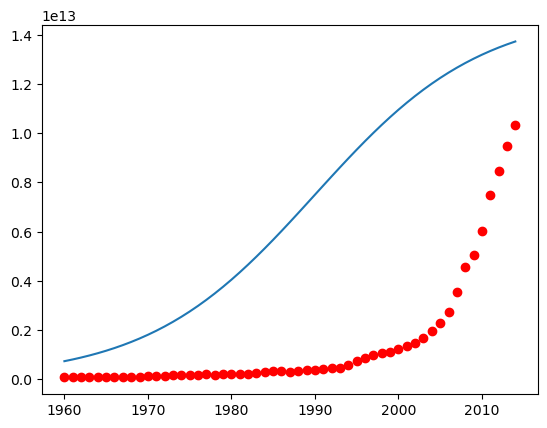

In [27]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')


### Our task here is to find the best parameters for our model. Lets first normalize our x and y:



In [29]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

### we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.popt are our optimized parameters.

In [30]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.448244, beta_2 = 0.997207


### Now we plot our resulting regression model.

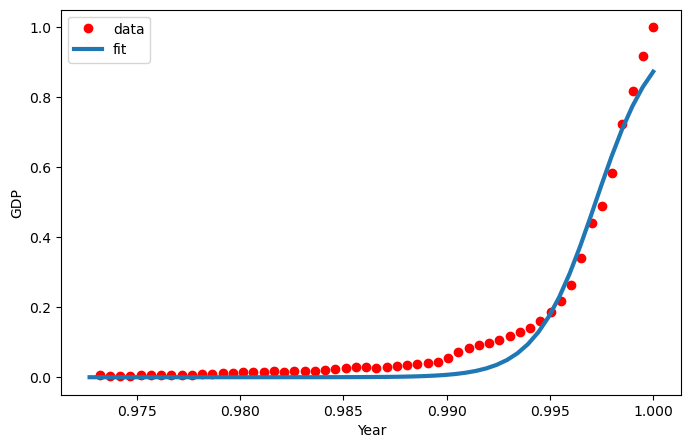

In [31]:


x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

